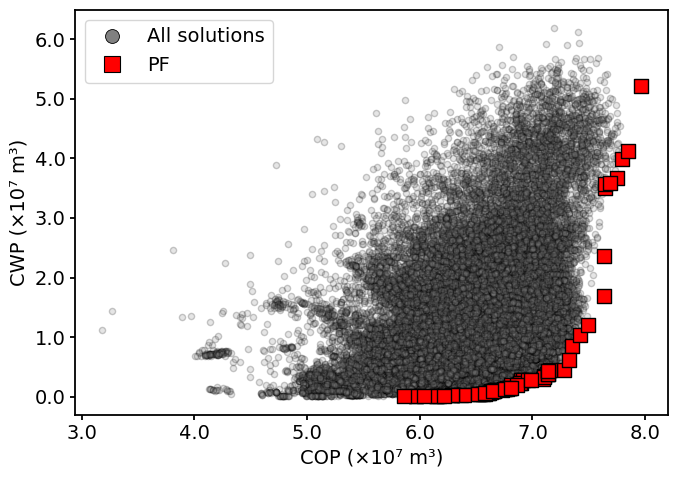

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

# ---------------------------------------------------
# Style FIRST (this resets rcParams)
# ---------------------------------------------------
plt.style.use("default")

# ---------------------------------------------------
# Global font and style configuration (AFTER style)
# ---------------------------------------------------
font_size = 14
mpl.rcParams.update({
    "font.size": font_size,
    "axes.labelsize": font_size,
    "axes.titlesize": font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    "legend.fontsize": font_size,
    "axes.linewidth": 1.3,
})

# ---------------------------------------------------
# Load dataset
# ---------------------------------------------------
df = pd.read_csv("datasets/MOU1D.csv", delimiter=";", engine="python")
objs = df.values[:, -2:]

# ---------------------------------------------------
# Objective directions
# True  -> minimize
# False -> maximize
# ---------------------------------------------------
minimize = np.array([False, True])

# ---------------------------------------------------
# Dominance check
# ---------------------------------------------------
def dominates(q, p, minimize):
    better_or_equal = True
    strictly_better = False

    for k in range(len(p)):
        if minimize[k]:
            if q[k] > p[k]:
                return False
            if q[k] < p[k]:
                strictly_better = True
        else:
            if q[k] < p[k]:
                return False
            if q[k] > p[k]:
                strictly_better = True

    return strictly_better

# ---------------------------------------------------
# Update Pareto front
# ---------------------------------------------------
def update_pareto_front(current_pf, batch, minimize):
    for b in batch:
        dominated = False
        to_remove = []

        for i, p in enumerate(current_pf):
            if dominates(p, b, minimize):
                dominated = True
                break
            if dominates(b, p, minimize):
                to_remove.append(i)

        if not dominated:
            for idx in reversed(to_remove):
                current_pf.pop(idx)
            current_pf.append(b)

    return current_pf

# ---------------------------------------------------
# Compute Pareto front
# ---------------------------------------------------
batch_size = 2000
pareto_frontier = []

for start in range(0, len(objs), batch_size):
    batch = objs[start:start + batch_size]
    pareto_frontier = update_pareto_front(pareto_frontier, batch, minimize)

pf = np.array(pareto_frontier)

# ---------------------------------------------------
# Plot
# ---------------------------------------------------
plt.figure(figsize=(7, 5))

plt.scatter(
    objs[:, 0], objs[:, 1],
    color="grey",
    alpha=0.2,
    s=20,
    rasterized=True,
    edgecolors="black"
)

plt.scatter(
    pf[:, 0], pf[:, 1],
    color="red",
    s=100,
    marker="s",
    edgecolors="black"
)

plt.xlabel("COP (×10⁷ m³)")
plt.ylabel("CWP (×10⁷ m³)")

ax = plt.gca()

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e7:.1f}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y/1e7:.1f}"))

ax.tick_params(colors="black", width=1.3)

legend_elements = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="",
        markerfacecolor="grey",
        markeredgecolor="black",
        markeredgewidth=0.6,
        markersize=10,
        label="All solutions"
    ),
    Line2D(
        [0], [0],
        marker="s",
        linestyle="",
        markerfacecolor="red",
        markeredgecolor="black",
        markeredgewidth=0.8,
        markersize=11,
        label="PF"
    )
]

ax.legend(handles=legend_elements, loc="upper left", frameon=True)

plt.tight_layout()
plt.savefig("figures/MOU1D.pdf")
# plt.show()


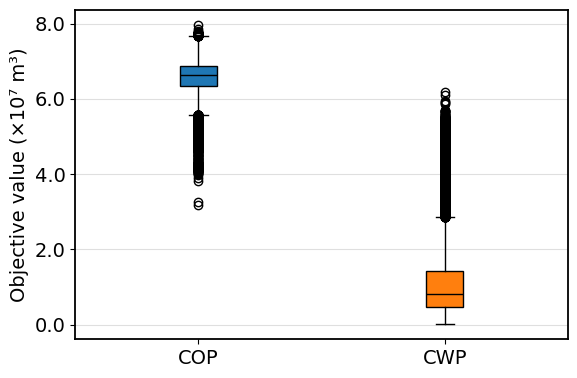

In [2]:
import matplotlib.pyplot as plt

obj_cols = ["COP", "CWP"]

plt.figure(figsize=(6, 4))
box = plt.boxplot(
    objs,
    tick_labels=obj_cols,
    showfliers=True,
    patch_artist=True
)

colors = ["tab:blue", "tab:orange"]

for element in ["boxes", "whiskers", "caps", "medians"]:
    plt.setp(box[element], color="black")

for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

plt.ylabel("Objective value (×10⁷ m³)")
plt.grid(True, axis="y", alpha=0.4)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y/1e7:.1f}"))
plt.tight_layout()
plt.savefig("figures/boxplot_MOU1D.pdf")
plt.show()
